### __Hyperparameter Tuning Experiment - Scaling & PCA Testing__

#### Reference Links:
> - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
> - https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
> - https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/
> - https://medium.com/aiplusoau/hyperparameter-tuning-a5fe69d2a6c7
> - https://www.kaggle.com/code/prashant111/catboost-classifier-in-python/notebook
> - https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_grid_search


In [1]:
#import the required packages here
# import libraries
import numpy as np
import pandas as pd
import io
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image


# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import seaborn
import seaborn as sns

# import plotly graph objects
import plotly.graph_objs as go
import plotly.express as px


# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, FeatureUnion
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### __Import data from csv files__

In [2]:
# import data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

print('\nTrain Data:')
train_df.info()
train_df

print('\nTest Data:')
test_df.info()
test_df


Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    344 non-null    int64  
 1   mean radius              344 non-null    float64
 2   mean texture             344 non-null    float64
 3   mean perimeter           344 non-null    float64
 4   mean area                344 non-null    float64
 5   mean smoothness          344 non-null    float64
 6   mean compactness         344 non-null    float64
 7   mean concavity           344 non-null    float64
 8   mean concave points      344 non-null    float64
 9   mean symmetry            344 non-null    float64
 10  mean fractal dimension   344 non-null    float64
 11  radius error             344 non-null    float64
 12  texture error            344 non-null    float64
 13  perimeter error          344 non-null    float64
 14  area error   

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
1,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
2,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
3,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
4,5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1
340,560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
341,562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,0.2128,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,0
342,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,0



Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    100 non-null    int64  
 1   mean radius              100 non-null    float64
 2   mean texture             100 non-null    float64
 3   mean perimeter           100 non-null    float64
 4   mean area                100 non-null    float64
 5   mean smoothness          100 non-null    float64
 6   mean compactness         100 non-null    float64
 7   mean concavity           100 non-null    float64
 8   mean concave points      100 non-null    float64
 9   mean symmetry            100 non-null    float64
 10  mean fractal dimension   100 non-null    float64
 11  radius error             100 non-null    float64
 12  texture error            100 non-null    float64
 13  perimeter error          100 non-null    float64
 14  area error     

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,...,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464,1
1,170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,...,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771,1
2,84,12.00,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,...,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924,1
3,456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,0.1799,...,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220,1
4,85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,...,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,0.1990,...,19.14,113.10,861.5,0.12350,0.25500,0.21140,0.12510,0.3153,0.08960,1
96,307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,1
97,219,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,...,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,0
98,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,0


#### __Scale & Dimensionality Reduction__

In [16]:
# start time to measure the time of the program execution
start_time = time.time()

# Scale data
train_copied = train_df.copy()

# prepare data for scaling
train_copied = train_copied.drop(['index'], axis=1)
y_copy = train_copied['target']
X_copy = train_copied.drop(['target'], axis=1)

# perform a robust scaler transform of the dataset
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X_copy)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.009920835494995117 seconds ---


(344, 30)

array([3.70512994e-01, 1.32129695e-01, 5.58475292e-02, 4.32322966e-02,
       2.89744158e-02, 2.15827057e-02, 1.15253922e-02, 8.71197324e-03,
       7.54159214e-03, 7.16046056e-03, 5.95351362e-03, 5.68930682e-03,
       5.05007440e-03, 2.89981108e-03, 1.97718602e-03, 1.64182939e-03,
       1.19864790e-03, 1.15582186e-03, 7.80809056e-04, 6.58435083e-04,
       6.17277412e-04, 5.72849130e-04, 4.12963358e-04, 3.68630247e-04,
       3.09016445e-04, 2.27492116e-04, 1.28860033e-04, 3.86337755e-05,
       1.74502937e-05, 4.14723257e-06])

array([5.16810884e-01, 1.84301402e-01, 7.78990518e-02, 6.03026662e-02,
       4.04150291e-02, 3.01046856e-02, 1.60762193e-02, 1.21519155e-02,
       1.05194068e-02, 9.98778453e-03, 8.30427187e-03, 7.93574242e-03,
       7.04410764e-03, 4.04480801e-03, 2.75788238e-03, 2.29010942e-03,
       1.67193671e-03, 1.61220072e-03, 1.08911327e-03, 9.18419657e-04,
       8.61010788e-04, 7.99039899e-04, 5.76022869e-04, 5.14184729e-04,
       4.31032284e-04, 3.17317891e-04, 1.79740707e-04, 5.38884087e-05,
       2.43405815e-05, 5.78477669e-06])

1.0000000000000002

,explained_variance,pca_component
0,0.516811,1
1,0.184301,2
2,0.077899,3
3,0.060303,4
4,0.040415,5
5,0.030105,6
6,0.016076,7
7,0.012152,8
8,0.010519,9
9,0.009988,10


,explained_variance,pca_component,cumulative_explained_variance
0,0.516811,1,0.516811
1,0.184301,2,0.701112
2,0.077899,3,0.779011
3,0.060303,4,0.839314
4,0.040415,5,0.879729
5,0.030105,6,0.909834
6,0.016076,7,0.925910
7,0.012152,8,0.938062
8,0.010519,9,0.948581
9,0.009988,10,0.958569




--- 0.1741647720336914 seconds ---


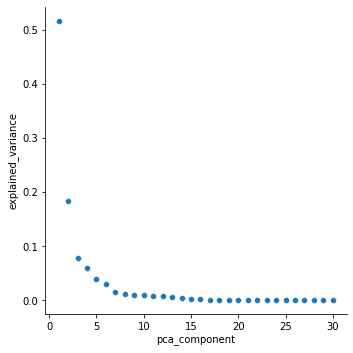

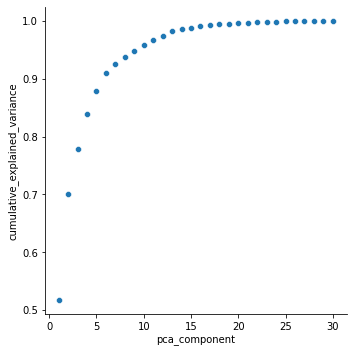

In [17]:
# start time to measure the time of the program execution
start_time = time.time()

# convert scaled X to dataframe for PCA process
df_scale = pd.DataFrame(X_scaled, columns = X_copy.columns.tolist())

# PCA
pca = PCA()
pca_data = pca.fit_transform(df_scale)
pca_data.shape

# check PCA explained variance
pca.explained_variance_
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

# summary of PCA variance
pca_variance_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['explained_variance'])
pca_variance_df['pca_component'] = [i + 1 for i in range(30)]
pca_variance_df

# visualize PCA variance
sns.relplot(data=pca_variance_df, x='pca_component', y ='explained_variance')

# add cumulative variance to summary PCA above
pca_variance_df['cumulative_explained_variance'] = pca_variance_df['explained_variance'].cumsum()
pca_variance_df

# visualize PCA variance cumulative
sns.relplot(data=pca_variance_df, x='pca_component', y ='cumulative_explained_variance')

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Train data split to train/test for model training__
> - train/test split on the original data, not the scaled data

In [7]:
y = train_df['target']
X = train_df.drop(['target'], axis=1)

X

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
2,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
3,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
4,5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
340,560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
341,562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090
342,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637


In [8]:
# start time to measure the time of the program execution
start_time = time.time()

# split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.014887571334838867 seconds ---


### __PCA & Scaling Test on Models__
* __Step 1.__  Train Models without scaling / PCA
* __Step 2.__  Train Models with Scaling but no PCA
* __Step 3.__  Train Models with both, scaling/PCA

### __Machine Learning Models trained:__
> - Logistic Regression
> - Gausian Naive Bayes
> - KNN
> - Decision Tree
> - Random Forest
> - Stochastic Gradient Descent (SGD)
> - SVM
> - Catboost
> - XGBoost

#### Setting up a function for measuring the model performance

In [25]:
# start time to measure the time of the program execution
start_time = time.time()

# function for performance metrics - scores
def model_metrics(y_test, y_pred, model_name):
    
    # measurig the model performance
    md_accuracy = accuracy_score(y_test, y_pred)
    md_f1 = f1_score(y_test, y_pred, average='macro')
    md_precision = precision_score(y_test, y_pred, average='macro')
    md_recall = recall_score(y_test, y_pred, average='macro')

    return model_name, md_accuracy, md_f1, md_precision, md_recall

# create a summary table in pd.dataframe
def summary_metrics_table(model_name_arr, md_accuracy, md_f1, md_precision, md_recall):
    
    df_metrics = pd.DataFrame({
        'models': model_name_arr,
        'accuracy_scores': md_accuracy,
        'f1_scores': md_f1,
        'precision': md_precision,
        'recall': md_recall
    })
    
    return df_metrics    
    
# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.0 seconds ---


#### __Step 1. Train Models without scaling / PCA__

In [23]:
# start time to measure the time of the program execution
start_time = time.time()

# train models

# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

# Gausian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SGD
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# CatBoost
cb = CatBoostClassifier()
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

C:\Users\hnico\anaconda3\envs\jupyterlab_3.3.2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

GaussianNB()

KNeighborsClassifier()

DecisionTreeClassifier()

RandomForestClassifier()

SGDClassifier()

SVC(gamma='auto')

Learning rate set to 0.005936
0:	learn: 0.6837724	total: 30ms	remaining: 30s
1:	learn: 0.6740760	total: 32.5ms	remaining: 16.2s
2:	learn: 0.6652540	total: 35.1ms	remaining: 11.7s
3:	learn: 0.6566883	total: 37.6ms	remaining: 9.35s
4:	learn: 0.6486359	total: 40.2ms	remaining: 8s
5:	learn: 0.6405111	total: 42.8ms	remaining: 7.08s
6:	learn: 0.6318253	total: 45.3ms	remaining: 6.43s
7:	learn: 0.6245757	total: 47.8ms	remaining: 5.93s
8:	learn: 0.6152904	total: 50.3ms	remaining: 5.54s
9:	learn: 0.6070278	total: 53.3ms	remaining: 5.27s
10:	learn: 0.5988566	total: 55.8ms	remaining: 5.02s
11:	learn: 0.5907037	total: 58.4ms	remaining: 4.8s
12:	learn: 0.5834813	total: 61ms	remaining: 4.63s
13:	learn: 0.5762124	total: 63.6ms	remaining: 4.48s
14:	learn: 0.5690208	total: 66.3ms	remaining: 4.35s
15:	learn: 0.5622169	total: 69ms	remaining: 4.25s
16:	learn: 0.5558029	total: 71.8ms	remaining: 4.15s
17:	learn: 0.5482608	total: 74.4ms	remaining: 4.06s
18:	learn: 0.5418855	total: 77.2ms	remaining: 3.98s
19:	

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)



--- 2.5716848373413086 seconds ---


In [30]:
# start time to measure the time of the program execution
start_time = time.time()

# Measure the model performance
# make a list of y_pred arrays & corresponding model names
y_pred_lst = [y_pred_lg, y_pred_gnb, y_pred_knn, y_pred_dt,
               y_pred_rf, y_pred_sgd, y_pred_svc, y_pred_cb,
               y_pred_xgb]

model_name_lst = ['Logistic Regression', 'Gausian NB', 'KNN',
                  'Decision Tree', 'Random Forest', 'SGD', 'SVC',
                  'CatBoost', 'XGBoost']

# process metrics function
index = 0
numbers = len(y_pred_lst)
model_name_arr = []
md_accuracy = []
md_f1 = []
md_precision = []
md_recall = []

for index in range(numbers):
    name, accu, f1_d, prec, recal = model_metrics(y_test, 
                                                  y_pred_lst[index],
                                                  model_name_lst[index])

    model_name_arr.append(name)
    md_accuracy.append(accu)
    md_f1.append(f1_d)
    md_precision.append(prec)
    md_recall.append(recal)
    
# process summary metrics function to produce the summary table
sum_table1 = summary_metrics_table(model_name_arr, md_accuracy, md_f1, md_precision, md_recall)
sum_table1

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

C:\Users\hnico\anaconda3\envs\jupyterlab_3.3.2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,models,accuracy_scores,f1_scores,precision,recall
0,Logistic Regression,0.942029,0.941919,0.941919,0.941919
1,Gausian NB,0.942029,0.941723,0.944397,0.940657
2,KNN,0.942029,0.941426,0.950000,0.939394
3,Decision Tree,0.956522,0.956485,0.956303,0.957071
4,Random Forest,0.956522,0.956375,0.957348,0.955808
5,SGD,0.855072,0.849739,0.891304,0.848485
6,SVC,0.521739,0.342857,0.260870,0.500000
7,CatBoost,0.956522,0.956375,0.957348,0.955808
8,XGBoost,0.956522,0.956375,0.957348,0.955808




--- 0.02465510368347168 seconds ---


#### __Step 2. Train Models with Scaling but no PCA__

In [18]:
# start time to measure the time of the program execution
start_time = time.time()

# train models

# Logistic Regression
lg = LogisticRegression()
pipe_lg = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', lg)])
pipe_lg.fit(X_train, y_train)
y_pred_lg2 = pipe_lg.predict(X_test)

# Gausian Naive Bayes
gnb = GaussianNB()
pipe_gnb = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', gnb)])
pipe_gnb.fit(X_train, y_train)
y_pred_gnb2 = pipe_gnb.predict(X_test)

# KNN
knn = KNeighborsClassifier()
pipe_knn = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', knn)])
pipe_knn.fit(X_train, y_train)
y_pred_knn2 = pipe_knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
pipe_dt = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', dt)])
pipe_dt.fit(X_train, y_train)
y_pred_dt2 = pipe_dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
pipe_rf = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', rf)])
pipe_rf.fit(X_train, y_train)
y_pred_rf2 = pipe_rf.predict(X_test)

# SGD
sgd = SGDClassifier()
pipe_sgd = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', sgd)])
pipe_sgd.fit(X_train, y_train)
y_pred_sgd2 = pipe_sgd.predict(X_test)

# SVC
svc = SVC(gamma='auto')
pipe_svc = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', svc)])
pipe_svc.fit(X_train, y_train)
y_pred_svc2 = pipe_svc.predict(X_test)

# CatBoost
cb = CatBoostClassifier()
pipe_cb = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', cb)])
pipe_cb.fit(X_train, y_train)
y_pred_cb2 = pipe_cb.predict(X_test)

# XGBoost
xgb = XGBClassifier()
pipe_xgb = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('model', xgb)])
pipe_xgb.fit(X_train, y_train)
y_pred_xgb2 = pipe_xgb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('model', LogisticRegression())])

Pipeline(steps=[('scale', MinMaxScaler()), ('model', GaussianNB())])

Pipeline(steps=[('scale', MinMaxScaler()), ('model', KNeighborsClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('model', DecisionTreeClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('model', RandomForestClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('model', SGDClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('model', SVC(gamma='auto'))])

Learning rate set to 0.005936
0:	learn: 0.6837724	total: 13.5ms	remaining: 13.5s
1:	learn: 0.6740760	total: 15.7ms	remaining: 7.84s
2:	learn: 0.6652540	total: 18.1ms	remaining: 6.01s
3:	learn: 0.6566883	total: 20.2ms	remaining: 5.03s
4:	learn: 0.6486359	total: 22.5ms	remaining: 4.48s
5:	learn: 0.6405111	total: 24.7ms	remaining: 4.1s
6:	learn: 0.6318253	total: 28.2ms	remaining: 3.99s
7:	learn: 0.6245757	total: 30.6ms	remaining: 3.79s
8:	learn: 0.6152904	total: 32.9ms	remaining: 3.62s
9:	learn: 0.6070278	total: 35.2ms	remaining: 3.48s
10:	learn: 0.5988566	total: 37.4ms	remaining: 3.36s
11:	learn: 0.5907037	total: 39.8ms	remaining: 3.27s
12:	learn: 0.5834813	total: 42ms	remaining: 3.19s
13:	learn: 0.5762124	total: 44.2ms	remaining: 3.11s
14:	learn: 0.5690208	total: 46.3ms	remaining: 3.04s
15:	learn: 0.5622169	total: 48.4ms	remaining: 2.97s
16:	learn: 0.5558029	total: 50.5ms	remaining: 2.92s
17:	learn: 0.5482608	total: 52.4ms	remaining: 2.86s
18:	learn: 0.5418855	total: 54.4ms	remaining: 2

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x00000268D8E3CEB0>)])

Pipeline(steps=[('scale', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                   



--- 2.508824348449707 seconds ---


In [31]:
# start time to measure the time of the program execution
start_time = time.time()

# Measure the model performance
# make a list of y_pred arrays & corresponding model names
y_pred_lst2 = [y_pred_lg2, y_pred_gnb2, y_pred_knn2, y_pred_dt2,
               y_pred_rf2, y_pred_sgd2, y_pred_svc2, y_pred_cb2,
               y_pred_xgb2]

# process metrics function
index = 0
numbers = len(y_pred_lst2)
model_name_arr2 = []
md_accuracy2 = []
md_f12 = []
md_precision2 = []
md_recall2 = []

for index in range(numbers):
    name, accu, f1_d, prec, recal = model_metrics(y_test, 
                                                  y_pred_lst2[index],
                                                  model_name_lst[index])
    
    model_name_arr2.append(name)
    md_accuracy2.append(accu)
    md_f12.append(f1_d)
    md_precision2.append(prec)
    md_recall2.append(recal)
    
# process summary metrics function to produce the summary table
sum_table2 = summary_metrics_table(model_name_arr2, md_accuracy2, md_f12, md_precision2, md_recall2)
sum_table2

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,models,accuracy_scores,f1_scores,precision,recall
0,Logistic Regression,0.956522,0.956375,0.957348,0.955808
1,Gausian NB,0.942029,0.941723,0.944397,0.940657
2,KNN,0.942029,0.941723,0.944397,0.940657
3,Decision Tree,0.956522,0.956485,0.956303,0.957071
4,Random Forest,0.942029,0.941723,0.944397,0.940657
5,SGD,0.956522,0.956190,0.961538,0.954545
6,SVC,0.942029,0.941723,0.944397,0.940657
7,CatBoost,0.956522,0.956375,0.957348,0.955808
8,XGBoost,0.956522,0.956375,0.957348,0.955808




--- 0.02342844009399414 seconds ---


#### __Step3. Train Models with both, sacling/PCA__

In [28]:
# start time to measure the time of the program execution
start_time = time.time()

# train models

# Logistic Regression
lg = LogisticRegression()
pipe_lg3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', lg)])
pipe_lg3.fit(X_train, y_train)
y_pred_lg3 = pipe_lg3.predict(X_test)

# Gausian Naive Bayes
gnb = GaussianNB()
pipe_gnb3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', gnb)])
pipe_gnb3.fit(X_train, y_train)
y_pred_gnb3 = pipe_gnb3.predict(X_test)

# KNN
knn = KNeighborsClassifier()
pipe_knn3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', knn)])
pipe_knn3.fit(X_train, y_train)
y_pred_knn3 = pipe_knn3.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
pipe_dt3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', dt)])
pipe_dt3.fit(X_train, y_train)
y_pred_dt3 = pipe_dt3.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
pipe_rf3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', rf)])
pipe_rf3.fit(X_train, y_train)
y_pred_rf3 = pipe_rf3.predict(X_test)

# SGD
sgd = SGDClassifier()
pipe_sgd3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', sgd)])
pipe_sgd3.fit(X_train, y_train)
y_pred_sgd3 = pipe_sgd3.predict(X_test)

# SVC
svc = SVC(gamma='auto')
pipe_svc3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', svc)])
pipe_svc3.fit(X_train, y_train)
y_pred_svc3 = pipe_svc3.predict(X_test)

# CatBoost
cb = CatBoostClassifier()
pipe_cb3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', cb)])
pipe_cb3.fit(X_train, y_train)
y_pred_cb3 = pipe_cb3.predict(X_test)

# XGBoost
xgb = XGBClassifier()
pipe_xgb3 = Pipeline(steps=[('scale', MinMaxScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('model', xgb)])
pipe_xgb3.fit(X_train, y_train)
y_pred_xgb3 = pipe_xgb3.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', LogisticRegression())])

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', GaussianNB())])

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', KNeighborsClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', DecisionTreeClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', RandomForestClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', SGDClassifier())])

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model', SVC(gamma='auto'))])

Learning rate set to 0.005936
0:	learn: 0.6844854	total: 1.17ms	remaining: 1.17s
1:	learn: 0.6750713	total: 2.09ms	remaining: 1.04s
2:	learn: 0.6664196	total: 3.01ms	remaining: 1s
3:	learn: 0.6580341	total: 3.92ms	remaining: 975ms
4:	learn: 0.6503782	total: 4.78ms	remaining: 952ms
5:	learn: 0.6419829	total: 5.66ms	remaining: 937ms
6:	learn: 0.6343794	total: 6.51ms	remaining: 924ms
7:	learn: 0.6269511	total: 7.38ms	remaining: 916ms
8:	learn: 0.6192654	total: 8.23ms	remaining: 907ms
9:	learn: 0.6121198	total: 9.09ms	remaining: 900ms
10:	learn: 0.6048096	total: 9.92ms	remaining: 892ms
11:	learn: 0.5975314	total: 10.8ms	remaining: 886ms
12:	learn: 0.5890683	total: 11.6ms	remaining: 883ms
13:	learn: 0.5812206	total: 12.5ms	remaining: 879ms
14:	learn: 0.5758543	total: 13.3ms	remaining: 874ms
15:	learn: 0.5686069	total: 14.2ms	remaining: 871ms
16:	learn: 0.5620228	total: 15ms	remaining: 869ms
17:	learn: 0.5547561	total: 15.9ms	remaining: 866ms
18:	learn: 0.5482028	total: 16.7ms	remaining: 864

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x00000268F6CFF9A0>)])

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=3)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, re



--- 1.162942886352539 seconds ---


In [29]:
# start time to measure the time of the program execution
start_time = time.time()

# Measure the model performance
# make a list of y_pred arrays & corresponding model names
y_pred_lst3 = [y_pred_lg3, y_pred_gnb3, y_pred_knn3, y_pred_dt3,
               y_pred_rf3, y_pred_sgd3, y_pred_svc3, y_pred_cb3,
               y_pred_xgb3]

# process metrics function
index = 0
numbers = len(y_pred_lst3)
model_name_arr3 = []
md_accuracy3 = []
md_f13 = []
md_precision3 = []
md_recall3 = []

for index in range(numbers):
    name, accu, f1_d, prec, recal = model_metrics(y_test, 
                                                  y_pred_lst3[index],
                                                  model_name_lst[index])
    
    model_name_arr3.append(name)
    md_accuracy3.append(accu)
    md_f13.append(f1_d)
    md_precision3.append(prec)
    md_recall3.append(recal)
    
# process summary metrics function to produce the summary table
sum_table3 = summary_metrics_table(model_name_arr3, md_accuracy3, md_f13, md_precision3, md_recall3)
sum_table3

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,models,accuracy_scores,f1_scores,precision,recall
0,Logistic Regression,0.956522,0.956375,0.957348,0.955808
1,Gausian NB,0.956522,0.956375,0.957348,0.955808
2,KNN,0.942029,0.941723,0.944397,0.940657
3,Decision Tree,0.942029,0.941919,0.941919,0.941919
4,Random Forest,0.942029,0.941723,0.944397,0.940657
5,SGD,0.956522,0.956375,0.957348,0.955808
6,SVC,0.956522,0.956375,0.957348,0.955808
7,CatBoost,0.942029,0.941723,0.944397,0.940657
8,XGBoost,0.942029,0.941723,0.944397,0.940657




--- 0.02178645133972168 seconds ---


### __Using Scaled Trained Data__
> - not using pipeline for scaling data

#### __Step 2.2 Train Models with Scaled Train Data without PCA__

In [32]:
X_scaled

array([[0.6648564 , 0.24420239, 0.62266788, ..., 0.63917526, 0.23358959,
        0.28806375],
       [0.62180146, 0.36647927, 0.60240375, ..., 0.83505155, 0.40370589,
        0.27585622],
       [0.21718284, 0.33591005, 0.23611208, ..., 0.88487973, 1.        ,
        1.        ],
       ...,
       [0.40310191, 0.69571328, 0.41653274, ..., 0.80962199, 0.49753597,
        0.72787386],
       [0.64332893, 0.61243851, 0.6107889 , ..., 0.55945017, 0.19850187,
        0.09604951],
       [0.03811341, 0.48208011, 0.02885892, ..., 0.        , 0.25744136,
        0.13012886]])

In [33]:
# start time to measure the time of the program execution
start_time = time.time()

# split train/test
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.0009980201721191406 seconds ---


In [38]:
# start time to measure the time of the program execution
start_time = time.time()

# train models

# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train2, y_train2)
y_pred_lg4 = lg.predict(X_test2)

# Gausian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train2, y_train2)
y_pred_gnb4 = gnb.predict(X_test2)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train2, y_train2)
y_pred_knn4 = knn.predict(X_test2)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train2, y_train2)
y_pred_dt4 = dt.predict(X_test2)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train2, y_train2)
y_pred_rf4 = rf.predict(X_test2)

# SGD
sgd = SGDClassifier()
sgd.fit(X_train2, y_train2)
y_pred_sgd4 = sgd.predict(X_test2)

# SVC
svc = SVC(gamma='auto')
svc.fit(X_train2, y_train2)
y_pred_svc4 = svc.predict(X_test2)

# CatBoost
cb = CatBoostClassifier()
cb.fit(X_train2, y_train2)
y_pred_cb4 = cb.predict(X_test2)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train2, y_train2)
y_pred_xgb4 = xgb.predict(X_test2)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

LogisticRegression()

GaussianNB()

KNeighborsClassifier()

DecisionTreeClassifier()

RandomForestClassifier()

SGDClassifier()

SVC(gamma='auto')

Learning rate set to 0.005936
0:	learn: 0.6841457	total: 2.67ms	remaining: 2.67s
1:	learn: 0.6750640	total: 4.74ms	remaining: 2.37s
2:	learn: 0.6650816	total: 7.13ms	remaining: 2.37s
3:	learn: 0.6571983	total: 9.41ms	remaining: 2.34s
4:	learn: 0.6477907	total: 11.6ms	remaining: 2.32s
5:	learn: 0.6403202	total: 14.5ms	remaining: 2.39s
6:	learn: 0.6310296	total: 17ms	remaining: 2.4s
7:	learn: 0.6228883	total: 19.3ms	remaining: 2.4s
8:	learn: 0.6140137	total: 21.7ms	remaining: 2.39s
9:	learn: 0.6073172	total: 24ms	remaining: 2.37s
10:	learn: 0.6004159	total: 26.6ms	remaining: 2.39s
11:	learn: 0.5921977	total: 29ms	remaining: 2.39s
12:	learn: 0.5849958	total: 31.6ms	remaining: 2.4s
13:	learn: 0.5788976	total: 34ms	remaining: 2.39s
14:	learn: 0.5722088	total: 36.7ms	remaining: 2.41s
15:	learn: 0.5654289	total: 39.2ms	remaining: 2.41s
16:	learn: 0.5591680	total: 41.6ms	remaining: 2.4s
17:	learn: 0.5528728	total: 43.8ms	remaining: 2.39s
18:	learn: 0.5464352	total: 45.9ms	remaining: 2.37s
19:	

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)



--- 2.4084455966949463 seconds ---


In [35]:
# start time to measure the time of the program execution
start_time = time.time()

# Measure the model performance
# make a list of y_pred arrays & corresponding model names
y_pred_lst4 = [y_pred_lg4, y_pred_gnb4, y_pred_knn4, y_pred_dt4,
               y_pred_rf4, y_pred_sgd4, y_pred_svc4, y_pred_cb4,
               y_pred_xgb4]

model_name_lst = ['Logistic Regression', 'Gausian NB', 'KNN',
                  'Decision Tree', 'Random Forest', 'SGD', 'SVC',
                  'CatBoost', 'XGBoost']

# process metrics function
index = 0
numbers = len(y_pred_lst4)
model_name_arr4 = []
md_accuracy4 = []
md_f14 = []
md_precision4 = []
md_recall4 = []

for index in range(numbers):
    name, accu, f1_d, prec, recal = model_metrics(y_test, 
                                                  y_pred_lst4[index],
                                                  model_name_lst[index])

    model_name_arr4.append(name)
    md_accuracy4.append(accu)
    md_f14.append(f1_d)
    md_precision4.append(prec)
    md_recall4.append(recal)
    
# process summary metrics function to produce the summary table
sum_table4 = summary_metrics_table(model_name_arr4, md_accuracy4, md_f14, md_precision4, md_recall4)
sum_table4

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,models,accuracy_scores,f1_scores,precision,recall
0,Logistic Regression,0.956522,0.956375,0.957348,0.955808
1,Gausian NB,0.942029,0.941723,0.944397,0.940657
2,KNN,0.956522,0.956375,0.957348,0.955808
3,Decision Tree,0.956522,0.956485,0.956303,0.957071
4,Random Forest,0.956522,0.956485,0.956303,0.957071
5,SGD,0.956522,0.956375,0.957348,0.955808
6,SVC,0.927536,0.926984,0.932051,0.925505
7,CatBoost,0.942029,0.941723,0.944397,0.940657
8,XGBoost,0.971014,0.970960,0.970960,0.970960




--- 0.024768352508544922 seconds ---


#### __Step 3.2 Train Models with Scaled Train Data with PCA__

In [37]:
# start time to measure the time of the program execution
start_time = time.time()

# train models

# Logistic Regression
lg = LogisticRegression()
pipe_lg5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', lg)])
pipe_lg5.fit(X_train2, y_train2)
y_pred_lg5 = pipe_lg5.predict(X_test2)

# Gausian Naive Bayes
gnb = GaussianNB()
pipe_gnb5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', gnb)])
pipe_gnb5.fit(X_train2, y_train2)
y_pred_gnb5 = pipe_gnb5.predict(X_test2)

# KNN
knn = KNeighborsClassifier()
pipe_knn5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', knn)])
pipe_knn5.fit(X_train2, y_train2)
y_pred_knn5 = pipe_knn5.predict(X_test2)

# Decision Tree
dt = DecisionTreeClassifier()
pipe_dt5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', dt)])
pipe_dt5.fit(X_train2, y_train2)
y_pred_dt5 = pipe_dt5.predict(X_test2)

# Random Forest
rf = RandomForestClassifier()
pipe_rf5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', rf)])
pipe_rf5.fit(X_train2, y_train2)
y_pred_rf5 = pipe_rf5.predict(X_test2)

# SGD
sgd = SGDClassifier()
pipe_sgd5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', sgd)])
pipe_sgd5.fit(X_train2, y_train2)
y_pred_sgd5 = pipe_sgd5.predict(X_test2)

# SVC
svc = SVC(gamma='auto')
pipe_svc5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', svc)])
pipe_svc5.fit(X_train2, y_train2)
y_pred_svc5 = pipe_svc5.predict(X_test2)

# CatBoost
cb = CatBoostClassifier()
pipe_cb5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', cb)])
pipe_cb5.fit(X_train2, y_train2)
y_pred_cb5 = pipe_cb5.predict(X_test2)

# XGBoost
xgb = XGBClassifier()
pipe_xgb5 = Pipeline(steps=[('pca', PCA(n_components=3)), 
                          ('model', xgb)])
pipe_xgb5.fit(X_train2, y_train2)
y_pred_xgb5 = pipe_xgb5.predict(X_test2)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=3)), ('model', LogisticRegression())])

Pipeline(steps=[('pca', PCA(n_components=3)), ('model', GaussianNB())])

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('model', KNeighborsClassifier())])

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('model', DecisionTreeClassifier())])

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('model', RandomForestClassifier())])

Pipeline(steps=[('pca', PCA(n_components=3)), ('model', SGDClassifier())])

Pipeline(steps=[('pca', PCA(n_components=3)), ('model', SVC(gamma='auto'))])

Learning rate set to 0.005936
0:	learn: 0.6848469	total: 1.12ms	remaining: 1.11s
1:	learn: 0.6752057	total: 2.22ms	remaining: 1.11s
2:	learn: 0.6662598	total: 3.25ms	remaining: 1.08s
3:	learn: 0.6580537	total: 4.24ms	remaining: 1.05s
4:	learn: 0.6507188	total: 5.31ms	remaining: 1.06s
5:	learn: 0.6428767	total: 6.66ms	remaining: 1.1s
6:	learn: 0.6354750	total: 7.55ms	remaining: 1.07s
7:	learn: 0.6284665	total: 8.41ms	remaining: 1.04s
8:	learn: 0.6213170	total: 9.29ms	remaining: 1.02s
9:	learn: 0.6142945	total: 10.1ms	remaining: 1s
10:	learn: 0.6077140	total: 11ms	remaining: 989ms
11:	learn: 0.6018630	total: 11.9ms	remaining: 978ms
12:	learn: 0.5943435	total: 12.8ms	remaining: 970ms
13:	learn: 0.5864289	total: 13.7ms	remaining: 968ms
14:	learn: 0.5807470	total: 14.6ms	remaining: 957ms
15:	learn: 0.5731505	total: 15.5ms	remaining: 955ms
16:	learn: 0.5665609	total: 16.4ms	remaining: 948ms
17:	learn: 0.5594597	total: 17.2ms	remaining: 940ms
18:	learn: 0.5527050	total: 18.2ms	remaining: 938m

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x00000268F6D70B20>)])

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                



--- 1.1379094123840332 seconds ---


In [39]:
# start time to measure the time of the program execution
start_time = time.time()

# Measure the model performance
# make a list of y_pred arrays & corresponding model names
y_pred_lst5 = [y_pred_lg5, y_pred_gnb5, y_pred_knn5, y_pred_dt5,
               y_pred_rf5, y_pred_sgd5, y_pred_svc5, y_pred_cb5,
               y_pred_xgb5]

model_name_lst = ['Logistic Regression', 'Gausian NB', 'KNN',
                  'Decision Tree', 'Random Forest', 'SGD', 'SVC',
                  'CatBoost', 'XGBoost']

# process metrics function
index = 0
numbers = len(y_pred_lst)
model_name_arr5 = []
md_accuracy5 = []
md_f15 = []
md_precision5 = []
md_recall5 = []

for index in range(numbers):
    name, accu, f1_d, prec, recal = model_metrics(y_test, 
                                                  y_pred_lst5[index],
                                                  model_name_lst[index])

    model_name_arr5.append(name)
    md_accuracy5.append(accu)
    md_f15.append(f1_d)
    md_precision5.append(prec)
    md_recall5.append(recal)
    
# process summary metrics function to produce the summary table
sum_table5 = summary_metrics_table(model_name_arr5, md_accuracy5, md_f15, md_precision5, md_recall5)
sum_table5

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,models,accuracy_scores,f1_scores,precision,recall
0,Logistic Regression,0.942029,0.941723,0.944397,0.940657
1,Gausian NB,0.913043,0.912584,0.915110,0.911616
2,KNN,0.942029,0.941723,0.944397,0.940657
3,Decision Tree,0.942029,0.941723,0.944397,0.940657
4,Random Forest,0.956522,0.956375,0.957348,0.955808
5,SGD,0.942029,0.942017,0.942437,0.943182
6,SVC,0.956522,0.956375,0.957348,0.955808
7,CatBoost,0.971014,0.970960,0.970960,0.970960
8,XGBoost,0.942029,0.941919,0.941919,0.941919




--- 0.02484607696533203 seconds ---


### __Visualize the Summary Restuls__
> - Steps 1 to 3 with the original data & pipeline
> - Step3 2.2 & 3.2 with the scaled data

#### __Summary Plots for Step 1__

[Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.855072'),
 Text(0, 0, '0.521739'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522')]

[(0.3, 1.1)]



--- 0.021753787994384766 seconds ---


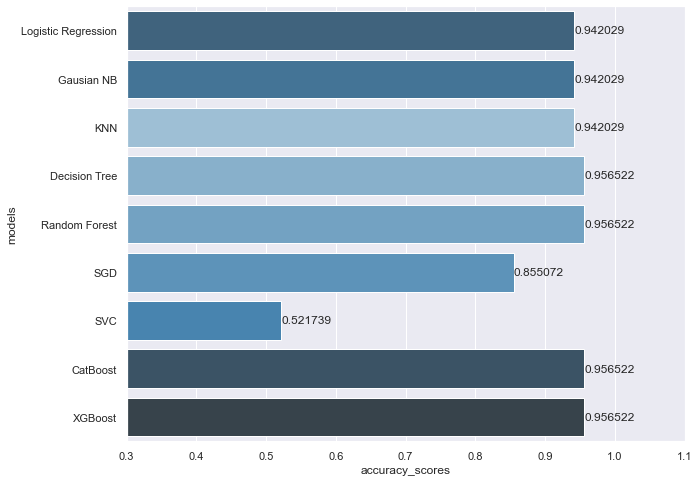

In [54]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table1.accuracy_scores.sort_values().index

palette = sns.color_palette('Blues_d', len(ranks))
ax = sns.barplot(x='accuracy_scores', y='models', palette=np.array(palette)[ranks], data=sum_table1)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.3, 1.1))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '0.941919'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941426'),
 Text(0, 0, '0.956485'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.849739'),
 Text(0, 0, '0.342857'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.956375')]

[(0.3, 1.1)]



--- 0.03067922592163086 seconds ---


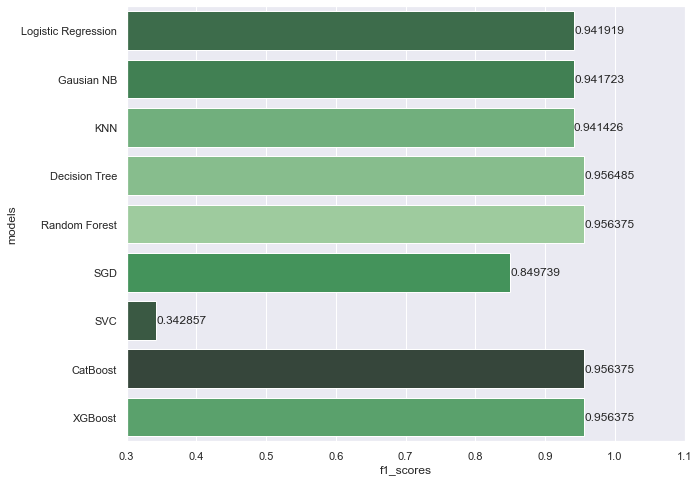

In [55]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table1.f1_scores.sort_values().index

palette = sns.color_palette('Greens_d', len(ranks))
ax = sns.barplot(x='f1_scores', y='models', palette=np.array(palette)[ranks], data=sum_table1)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.3, 1.1))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Summary Plots for Step 2__

[Text(0, 0, '0.956522'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522')]

[(0.8, 1.0)]



--- 0.03352952003479004 seconds ---


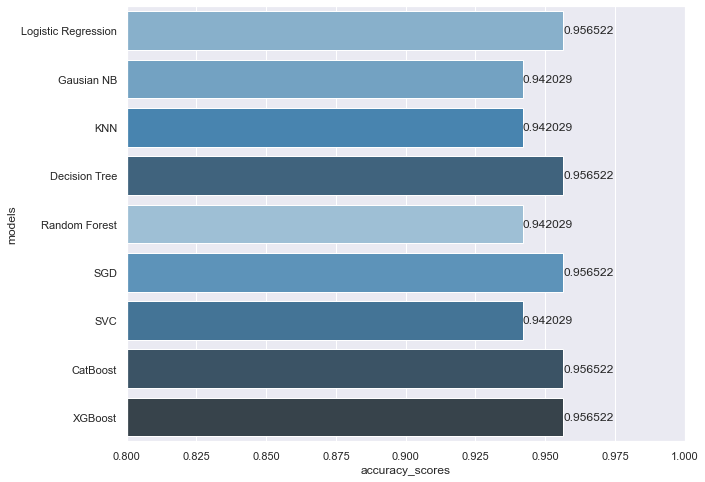

In [61]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table2.accuracy_scores.sort_values().index

palette = sns.color_palette('Blues_d', len(ranks))
ax = sns.barplot(x='accuracy_scores', y='models', palette=np.array(palette)[ranks], data=sum_table2)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '0.956375'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.956485'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.95619'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.956375')]

[(0.8, 1.0)]



--- 0.027286767959594727 seconds ---


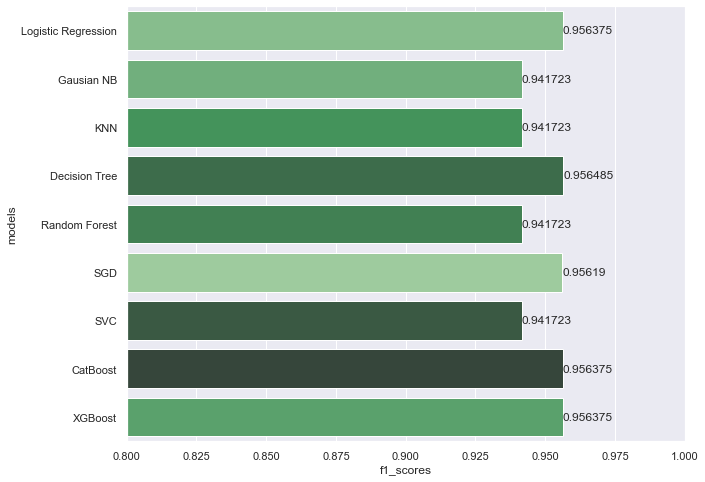

In [62]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table2.f1_scores.sort_values().index

palette = sns.color_palette('Greens_d', len(ranks))
ax = sns.barplot(x='f1_scores', y='models', palette=np.array(palette)[ranks], data=sum_table2)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Summary Plots for Step 3__

[Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029')]

[(0.8, 1.0)]



--- 0.0322260856628418 seconds ---


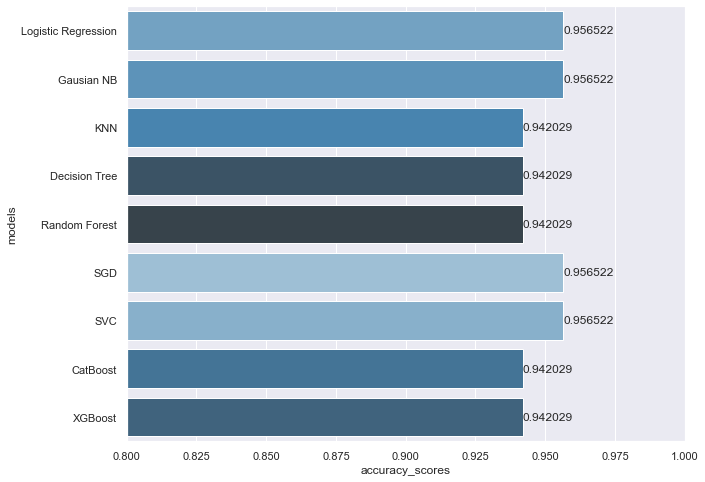

In [63]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table3.accuracy_scores.sort_values().index

palette = sns.color_palette('Blues_d', len(ranks))
ax = sns.barplot(x='accuracy_scores', y='models', palette=np.array(palette)[ranks], data=sum_table3)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '0.956375'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941919'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941723')]

[(0.8, 1.0)]



--- 0.03244638442993164 seconds ---


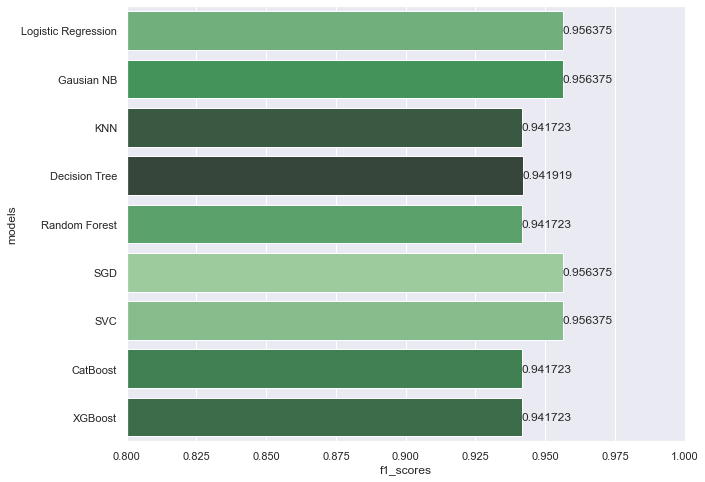

In [64]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table3.f1_scores.sort_values().index

palette = sns.color_palette('Greens_d', len(ranks))
ax = sns.barplot(x='f1_scores', y='models', palette=np.array(palette)[ranks], data=sum_table3)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Summary Plots for Step 2.2__

[Text(0, 0, '0.956522'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.927536'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.971014')]

[(0.8, 1.0)]



--- 0.12198591232299805 seconds ---


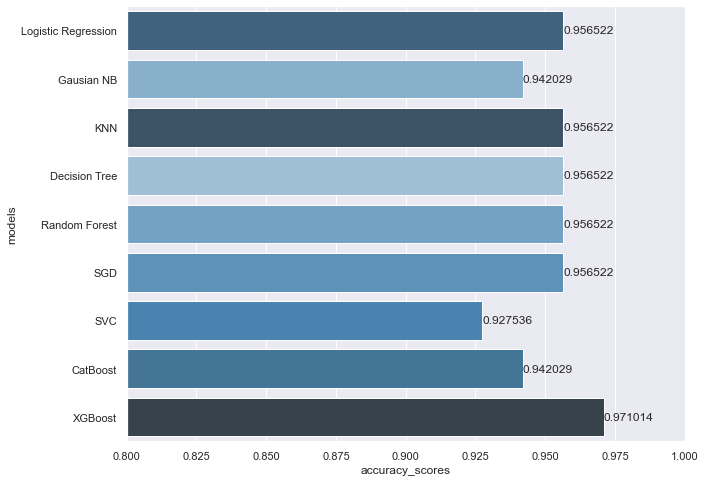

In [65]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table4.accuracy_scores.sort_values().index

palette = sns.color_palette('Blues_d', len(ranks))
ax = sns.barplot(x='accuracy_scores', y='models', palette=np.array(palette)[ranks], data=sum_table4)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '0.956375'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.956485'),
 Text(0, 0, '0.956485'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.926984'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.97096')]

[(0.8, 1.0)]



--- 0.031351327896118164 seconds ---


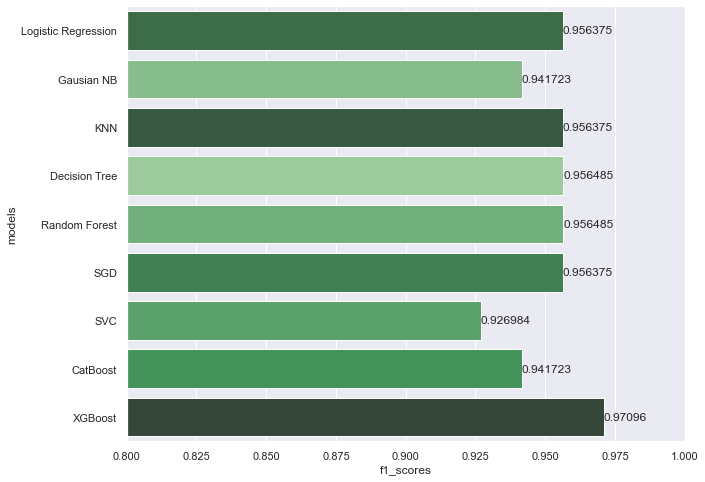

In [66]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table4.f1_scores.sort_values().index

palette = sns.color_palette('Greens_d', len(ranks))
ax = sns.barplot(x='f1_scores', y='models', palette=np.array(palette)[ranks], data=sum_table4)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Summary Plots for Step 3.2__

[Text(0, 0, '0.942029'),
 Text(0, 0, '0.913043'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.942029'),
 Text(0, 0, '0.956522'),
 Text(0, 0, '0.971014'),
 Text(0, 0, '0.942029')]

[(0.8, 1.0)]



--- 0.03028726577758789 seconds ---


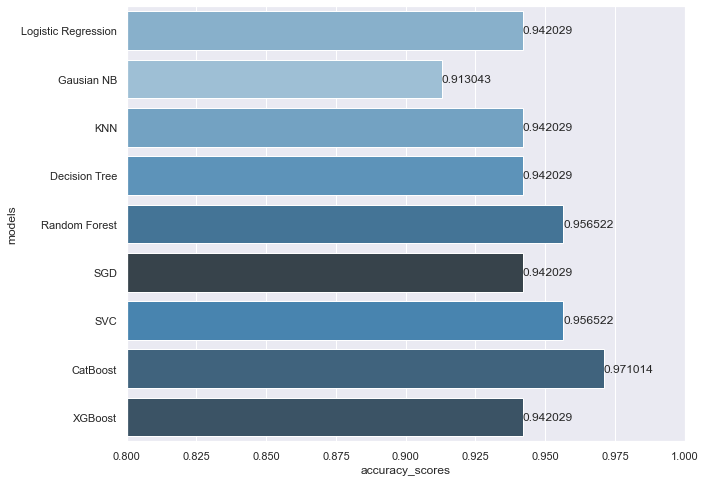

In [67]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table5.accuracy_scores.sort_values().index

palette = sns.color_palette('Blues_d', len(ranks))
ax = sns.barplot(x='accuracy_scores', y='models', palette=np.array(palette)[ranks], data=sum_table5)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '0.941723'),
 Text(0, 0, '0.912584'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.941723'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.942017'),
 Text(0, 0, '0.956375'),
 Text(0, 0, '0.97096'),
 Text(0, 0, '0.941919')]

[(0.8, 1.0)]



--- 0.02993321418762207 seconds ---


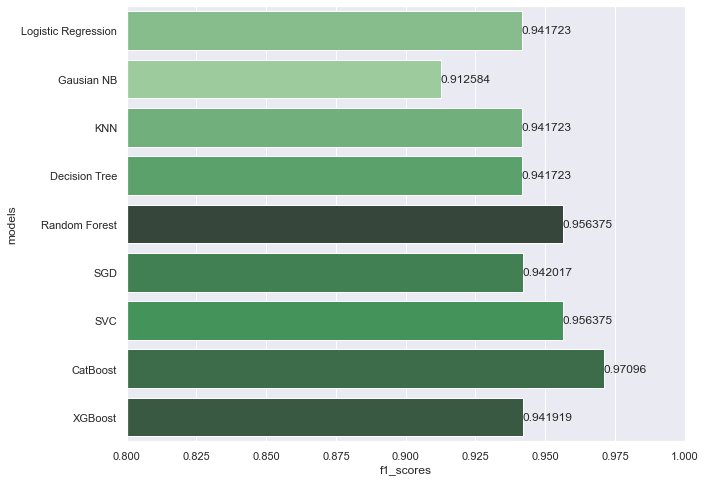

In [68]:
# start time to measure the time of the program execution
start_time = time.time()

sns.set(rc={'figure.figsize':(10,8)})

ranks = sum_table5.f1_scores.sort_values().index

palette = sns.color_palette('Greens_d', len(ranks))
ax = sns.barplot(x='f1_scores', y='models', palette=np.array(palette)[ranks], data=sum_table5)
ax.bar_label(ax.containers[0])

ax.set(xlim=(0.8, 1.0))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")